# Importing required library

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11490434/11490434 [==============================] - 0s 0us/step


Data Analysing

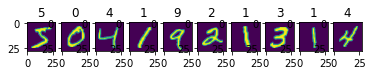

In [3]:
# plt.figure(figsize=(15,7))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.title(data[0][1][i])
  
  plt.imshow(data[0][0][i])

Text(0.5, 1.0, '7')

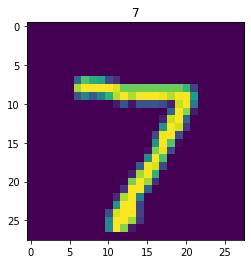

In [4]:
plt.imshow(data[1][0][0])
plt.title(data[1][1][0])

In [5]:
data[0][0].shape

(60000, 28, 28)

In [6]:
data[1][0].shape

(10000, 28, 28)

# Data seperation

In [7]:
train_x = data[0][0]
train_y = data[0][1]

In [8]:
test_x = data[1][0]
test_y = data[1][1]

In [9]:
train_x.shape

(60000, 28, 28)

# Data reshaping

In [11]:
x_train =[]
for i in range(len(train_x)):
  k = np.array(train_x[i])/255
  x_train.append(k.reshape(28*28))
# plt.imshow(k)

In [52]:
x_test = []
for i in range(len(test_x)):
  k = np.array(test_x[i])/255
  x_test.append(k.reshape(28*28))

In [55]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [56]:
y_train = np.array(train_y)
y_test = np.array(test_y)
# y_train.shape

# Design Simple Neural Network

In [15]:
# inputs = tf.keras.layers.InputLayer(input_shape=(28*28,))
layer_1 = tf.keras.layers.Dense(units = 25*25, activation='relu')
layer_2 = tf.keras.layers.Dense(units = 20*20, activation = 'relu')
layer_3 = tf.keras.layers.Dense(units = 10*10, activation = 'relu')
layer_4 = tf.keras.layers.Dense(units = 5*5, activation = 'relu')
layer_5 = tf.keras.layers.Dense(units = 10, activation = 'linear')

In [16]:
model = tf.keras.Sequential([layer_1,layer_2, layer_3, layer_4, layer_5])

# logits to minimize numerical error
adam is used for optimization. It operates similar to gradient descent but it choose learning rate according to need, it enhance the model by minimizing the cost

In [19]:
# from tensorflow.keras.loses import BinaryCrossEntropy
sce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# bce = tf.keras.losses.BinaryCrossentropy()
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=sce, optimizer=adam)

In [20]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2260
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0924
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0679
Epoch 4/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0531
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0428
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0350
Epoch 7/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0313
Epoch 8/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0268
Epoch 9/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0239
Epoch 10/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0207
Epoch 11/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0202
Epoch 12/20
1875/1875 [==============================] - 20s 11

In [172]:
logit = model(x_train)

# Softmax for multiclass regeression

In [173]:
f_x = tf.nn.softmax(logit)

In [174]:

f_x[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1920095e-08, 1.3872982e-09, 8.5710036e-11, 8.0226537e-06,
       3.6544374e-09, 9.9998730e-01, 4.6735622e-07, 3.2744567e-06,
       8.0379573e-07, 3.2984520e-08], dtype=float32)>

In [185]:

y_pred = model.predict(x_test)

313/313 [==============================] - 1s 5ms/step


In [186]:
f_y = tf.nn.softmax(y_pred)

In [189]:
y_predict = []
for i in range(len(y_pred)):
  prob = list(f_y[i].numpy())
  y_predict.append(prob.index(max(prob)))
# prob

# Accuracy calculation

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9848

# Testing

1/1 [==============================] - 0s 19ms/step
9


0.7280368

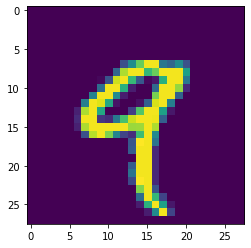

In [183]:
import cv2 
img = cv2.imread(f'/content/test_9.png',0)
img = cv2.resize(img,(28,28),interpolation = cv2.INTER_LINEAR)
img = img/255
img.shape
plt.imshow(img)
img =img.reshape(28*28)
img.shape
img= np.array([img])
# y_test[0].
y_pred = model.predict(img)
f_y = tf.nn.softmax(y_pred)
prob = list(f_y[0].numpy())
print(prob.index(max(prob)))
max(prob)

In [170]:
sum(prob)


array([0.0000000e+00, 3.6546392e-23, 3.4550436e-20, 1.0000000e+00,
       4.7741193e-30, 6.2992586e-21, 0.0000000e+00, 1.5128294e-24,
       4.5060420e-33, 1.1118080e-30], dtype=float32)

In [165]:
prob

[array([0.0000000e+00, 3.6546392e-23, 3.4550436e-20, 1.0000000e+00,
        4.7741193e-30, 6.2992586e-21, 0.0000000e+00, 1.5128294e-24,
        4.5060420e-33, 1.1118080e-30], dtype=float32)]